The following code snippets before Importing Libraries are taken from https://colab.research.google.com/drive/1DofKEdQYaXmDWBzuResXWWvxhLgDeVyl#scrollTo=8FgC4GlvHZQ1

In [1]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mrinmayigavali","key":"6d20341c9bf89dc7c0b872168adcb58d"}'}

In [2]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 70 Mar 20 05:25 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# List available datasets.
!kaggle datasets list

ref                                                          title                                                size  lastUpdated          downloadCount  
-----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
ronitf/heart-disease-uci                                     Heart Disease UCI                                     3KB  2018-06-25 11:33:56          17662  
karangadiya/fifa19                                           FIFA 19 complete player dataset                       2MB  2018-12-21 03:52:59          15297  
russellyates88/suicide-rates-overview-1985-to-2016           Suicide Rates Overview 1985 to 2016                 396KB  2018-12-01 19:18:25          13121  
iarunava/cell-images-for-detecting-malaria                   Malaria Cell Images Dataset                         337MB  2018-12-05 05:40:21           2984  
lava18/google-play-store-apps                             

In [6]:
# Copy the amazon data set locally.
!kaggle datasets download -d snap/amazon-fine-food-reviews

100% 250M/251M [00:02<00:00, 130MB/s]
100% 251M/251M [00:02<00:00, 98.7MB/s]


In [7]:
# Unzip the data
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [8]:
# Use this command to view your files
!ls

amazon-fine-food-reviews.zip  hashes.txt   Reviews.csv
database.sqlite		      kaggle.json  sample_data


In [11]:
#Dataframe manipulation
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

#Regex
import re

#NLTK toolkit
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#Train-Test Splitting
from sklearn.model_selection import train_test_split

#Classifer
from sklearn.linear_model import LogisticRegression

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Save and load model
import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
#Reading the csv file
df = pd.read_csv("Reviews.csv")

In [13]:
#View the first 10 instances
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [14]:
#Check the dimensions of the dataframe
df.shape

(568454, 10)

In [15]:
#Get a quick stat summary
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [16]:
#Check the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [0]:
#Drop the score marked as 3 as it is neither positive nor negative
df2 = df[df['Score'] != 3]

In [18]:
#Append a new sentiment column
df2['Sentiment'] = np.where(df2['Score'] >= 4, 1, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
#View the first 10 instances of the new dataframe
df2.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,1


In [0]:
#Deduplication
df2 = df2.drop_duplicates(subset={"UserId", "ProfileName", "Time", "Text"}, keep='first', inplace=False)

In [21]:
#After droppping duplicates, see the change in dimensions
df2.shape

(364173, 11)

In [0]:
#Data Preprocessing
#Preprocess the text
def text_to_words(raw_text):
    letters = re.sub("[^a-zA-Z]", " ",raw_text) #Grab letters
    words = letters.lower().split() #Lowercase                             
    stops = set(stopwords.words("english")) #Get unique stopwords                  
    meaningful_words = [w for w in words if not w in stops] 
    return ( " ".join( meaningful_words ))

In [0]:
#Append new column named clean text
df2['clean_text']=df2['Text'].apply(lambda x: text_to_words(x))

In [24]:
#View the first 5 instances of the modified dataframe
df2.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment,clean_text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1,bought several vitality canned dog food produc...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,product arrived labeled jumbo salted peanuts p...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1,confection around centuries light pillowy citr...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0,looking secret ingredient robitussin believe f...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1,great taffy great price wide assortment yummy ...


Text(0, 0.5, 'Frequency')

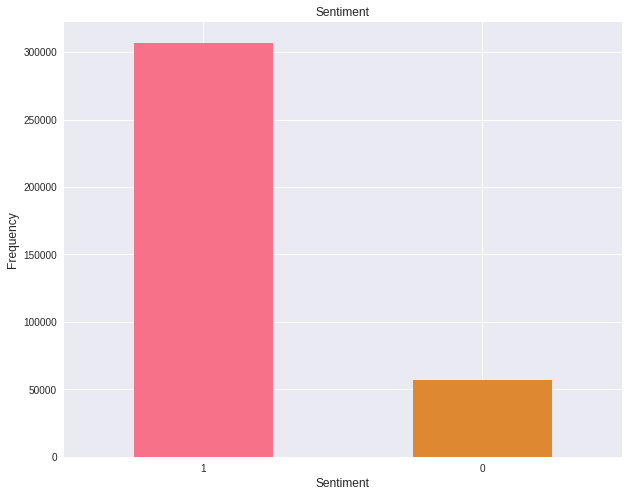

In [25]:
#Visualize the number of reviews of each score
colors=sns.color_palette("husl", 10)
pd.Series(df2['Sentiment']).value_counts().plot(kind = "bar",color=colors,figsize=(10,8),rot=0, title = "Sentiment")
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

In [0]:
#Split the data into two sets namely the train and test set
X_train, X_test, y_train, y_test = train_test_split(df2['clean_text'], df2['Sentiment'], test_size=0.25, random_state=0)

In [27]:
#Create the transform 
vectorizer = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))  

#Encode document
X_train_vector = vectorizer.fit_transform(X_train).toarray()
X_test_vector = vectorizer.transform(X_test).toarray()

#Summarize encoded vector
print("The shape of X_train_vector is: ", X_train_vector.shape)
print("The shape of X_test_vector is: ", X_test_vector.shape)

The shape of X_train_vector is:  (273129, 2000)
The shape of X_test_vector is:  (91044, 2000)


In [28]:
#Define the model and fit it to the training data
classifier = LogisticRegression(C=1.0, random_state=0, solver='sag')
classifier.fit(X_train_vector, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
#Evaluate the model on test data
y_pred = classifier.predict(X_test_vector)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 9051  5282]
 [ 2083 74628]]


In [30]:
#Check Precision, Recall and F1-Score of both classes (0 and 1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71     14333
           1       0.93      0.97      0.95     76711

   micro avg       0.92      0.92      0.92     91044
   macro avg       0.87      0.80      0.83     91044
weighted avg       0.91      0.92      0.91     91044



In [31]:
#Check accuracy
print('Training accuracy:', classifier.score(X_train_vector, y_train))
print('Test accuracy:', classifier.score(X_test_vector, y_test))

Training accuracy: 0.923091286534934
Test accuracy: 0.9191050481086068


In [0]:
#Save the model as a pickle object in Python
with open('logclassifier', 'wb') as picklefile:  
    pickle.dump(classifier,picklefile)

In [0]:
#Load the model
with open('logclassifier', 'rb') as training_model:  
    model = pickle.load(training_model)

In [34]:
#Verify that the model has been saved 
y_pred2 = model.predict(X_test_vector)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.63      0.71     14333
           1       0.93      0.97      0.95     76711

   micro avg       0.92      0.92      0.92     91044
   macro avg       0.87      0.80      0.83     91044
weighted avg       0.91      0.92      0.91     91044



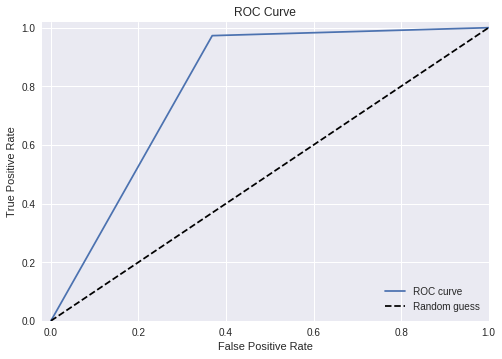

In [35]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
#Create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")

In [36]:
#Check the roc_auc_score
roc_auc_score(y_test, y_pred)

0.8021629693275063